## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')


In [2]:
game_data=pd.read_csv('/datasets/games.csv')

In [3]:
game_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод:

Данные отображаются нормально. С первого взгляда видно, что  в данных есть пропуски и нули. Названия столбиков не в змеином регистре, придется это исправлять. Переходим к предобработке данных.

## Подготовка данных

### Переводим названия столбиков в нижний регистр

In [5]:
#Вызовим список всех столбиков
game_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
#Изменяем регистр названий
game_data=game_data.rename(columns={'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre',  'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'})

In [7]:
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Изменяем типы данных в таблице

In [8]:
#Изменяем тип данных в столбике critic_score
game_data['critic_score']=game_data['critic_score'].astype('float')

In [9]:
#Посмотрим уникальные значения в user_score
game_data['user_score'].value_counts()        

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [10]:
#Заменяем значения tbd на NaN в user_score
game_data.loc[game_data['user_score']=='tbd', 'user_score']='NaN'
game_data['user_score'].value_counts()

NaN    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [11]:
#Изменяем тип данных в user_score
game_data['user_score']=game_data['user_score'].astype('float')

In [12]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Вывод:

Мы заменили тип данных в столбиках critic_score и user_score, потому что они имели численные значения, но по общим данным отображались как строчные данные. В user_score были обнаружены  значения tbd, это означает будет определено. Это мешало поменять тип данных. Пришлось поменять эти значения на NaN.

### Проверка пропусков в таблице

In [13]:
#Проверяем наличие пропущенных значений в таблице
game_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В решении проекта можно удалить все пропущенные значения. Удаляем их.

In [14]:
game_data=game_data.dropna(subset=['name', 'year_of_release'])
game_data.reset_index()


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#Поставим в данных rating ERSB вместо пропущенных значений заглушки
game_data['rating']=game_data['rating'].fillna('unknown')


In [16]:
#Заменим пропущенные значения в колонках critic_score и user_score на медианные значения
game_data['critic_score']=game_data['critic_score'].fillna(-5)
game_data['user_score']=game_data['user_score'].fillna(-5)



In [17]:
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-5.0,-5.0,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-5.0,-5.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-5.0,-5.0,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-5.0,-5.0,unknown


In [18]:
game_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Проверка нулей в таблице

In [19]:
#Проверяем данные на ошибки 
game_data['na_sales'].value_counts()

0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
14.44       1
13.96       1
2.35        1
2.96        1
4.40        1
Name: na_sales, Length: 401, dtype: int64

In [20]:
#Проверяем данные на ошибки 
game_data['eu_sales'].value_counts()

0.00    5766
0.01    1467
0.02    1290
0.03     911
0.04     702
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64

In [21]:
#Проверяем данные на ошибки 
game_data['jp_sales'].value_counts()

0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64

In [22]:
#Проверяем данные на ошибки 
game_data['other_sales'].value_counts()

0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

Вывод: Обнаруженные нули - это просто отсутствие продаж в данных регионах. Мы с ними ничего делать не будем, так и оставляем.

### Расчет суммарных продаж во всех регионах

In [23]:
#Создаем колонку для подсчета суммарных продаж 
game_data['total_sales']=game_data['na_sales']+game_data['eu_sales']+game_data['jp_sales']+game_data['other_sales']
game_data.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-5.0,-5.0,unknown,40.24
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-5.0,-5.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown,0.01
16440,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-5.0,-5.0,unknown,0.01
16441,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown,0.01
16442,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-5.0,-5.0,unknown,0.01


## Исследовательский анализ данных

### Построим график, показывающий  выпуск игр в разные годы

In [24]:
#Создаем сводную таблицу по году выпуска и названию игр 
game_data_year=game_data.pivot_table(index='year_of_release', values='name', aggfunc='count')

<AxesSubplot:xlabel='year_of_release', ylabel='name'>

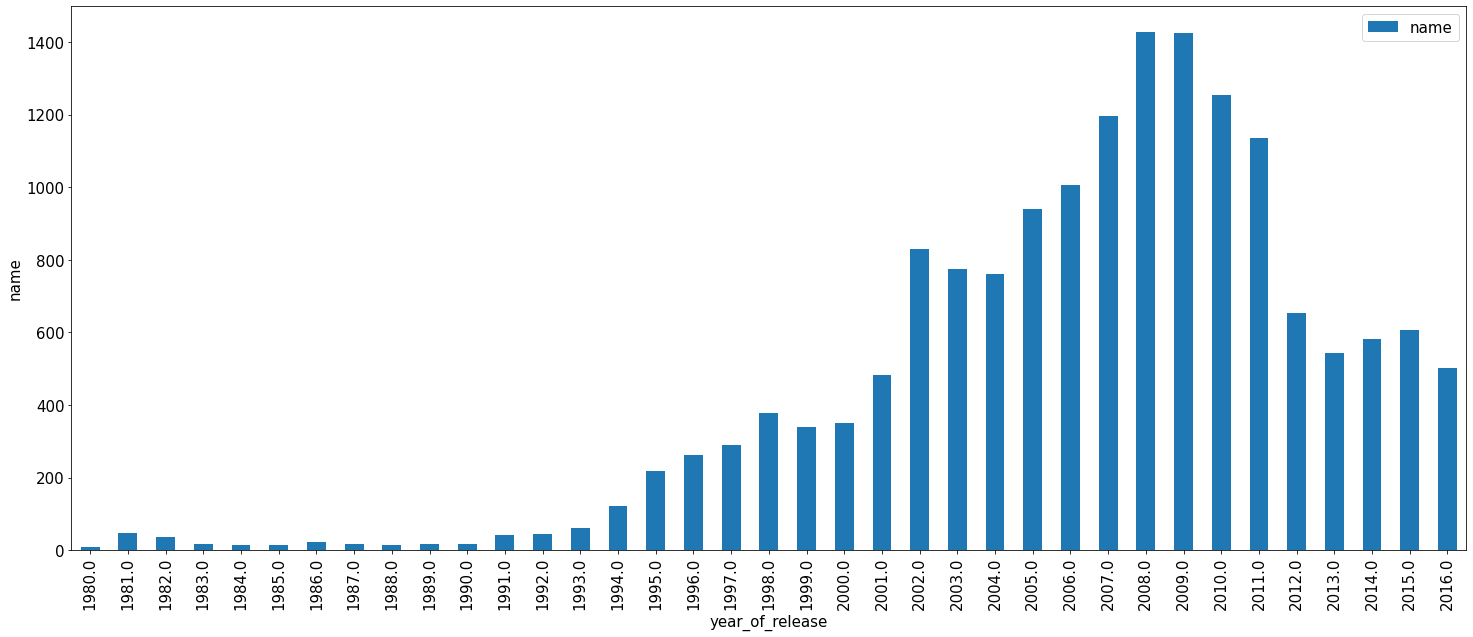

In [25]:
#Построем по ней график
plt.rcParams['font.size'] = '15'
game_data_year.plot(kind='bar', y='name', ylabel='name', figsize = (25,10))

Вывод:

По графику видно, что игры не всегда активно выпускались, поэтому за весь период данные не важны.

### Проверка продаж по платформам за разные годы

In [26]:
#Выберем 6 платформ с наибольшими суммарными продажами
game_data_platform=game_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
game_data_platform.sort_values(by='total_sales', ascending=False)
game_data_platform.sort_values(by='total_sales', ascending=False).head(6)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Построим по ним графики распределения суммарных продаж по годам

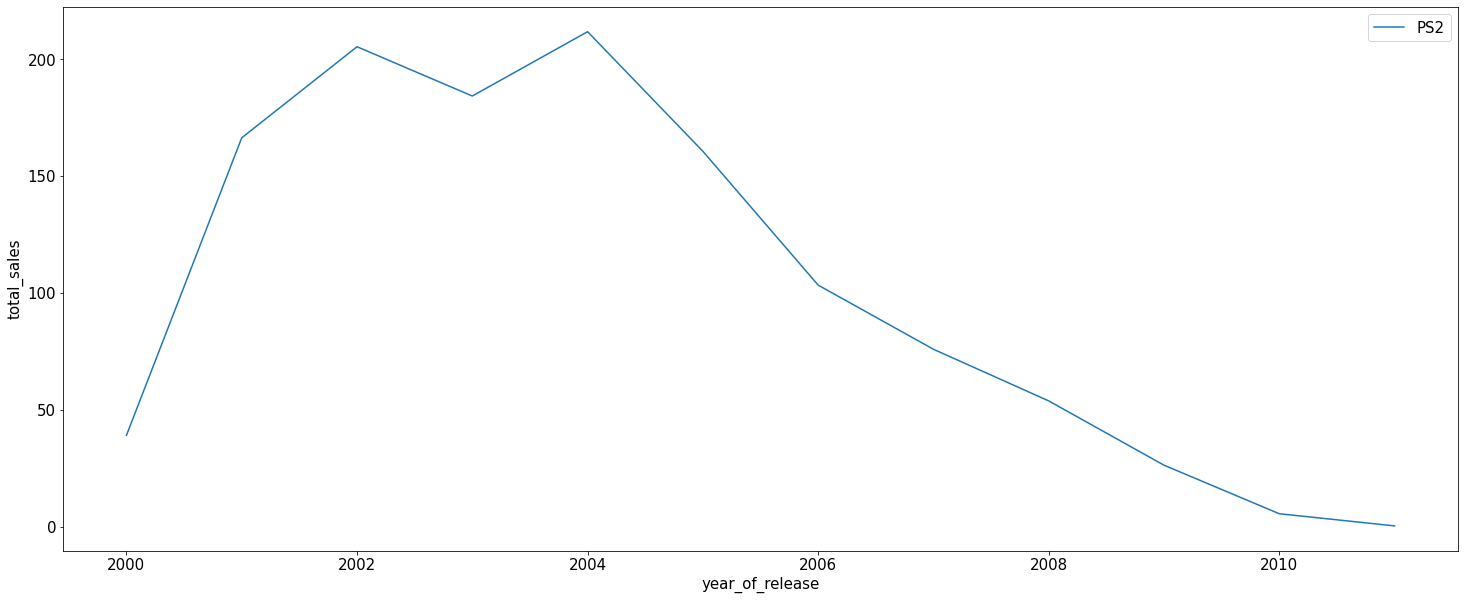

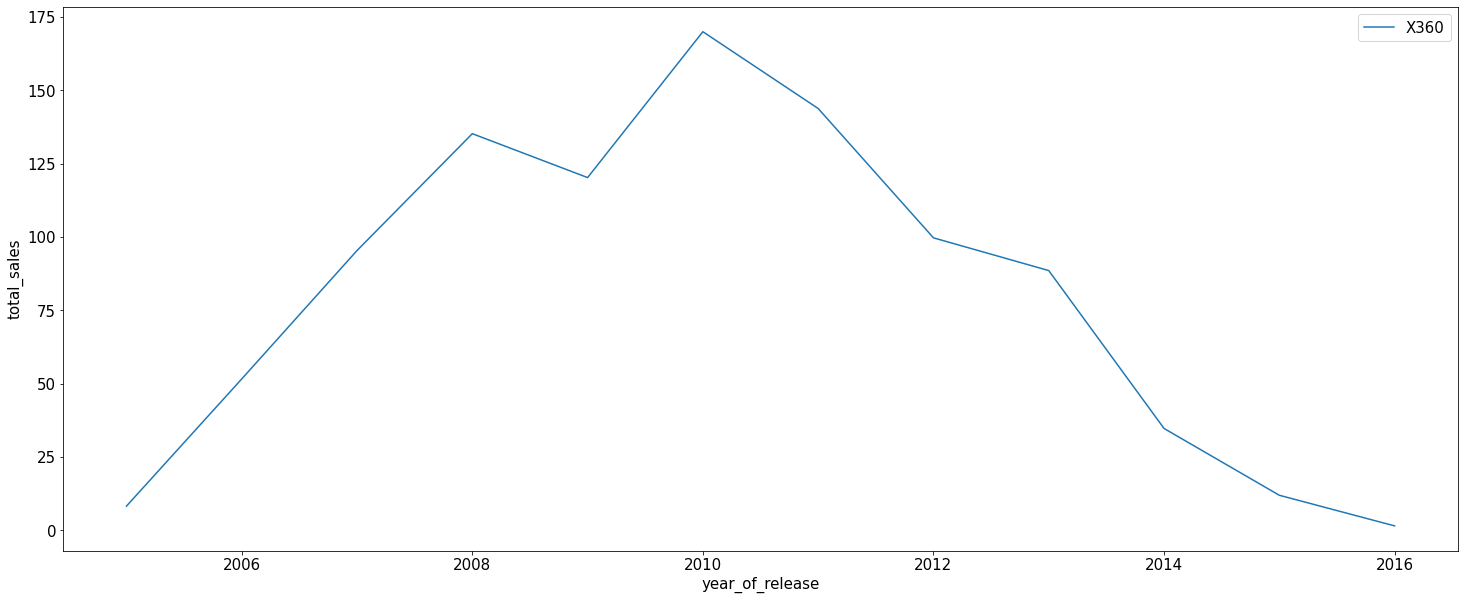

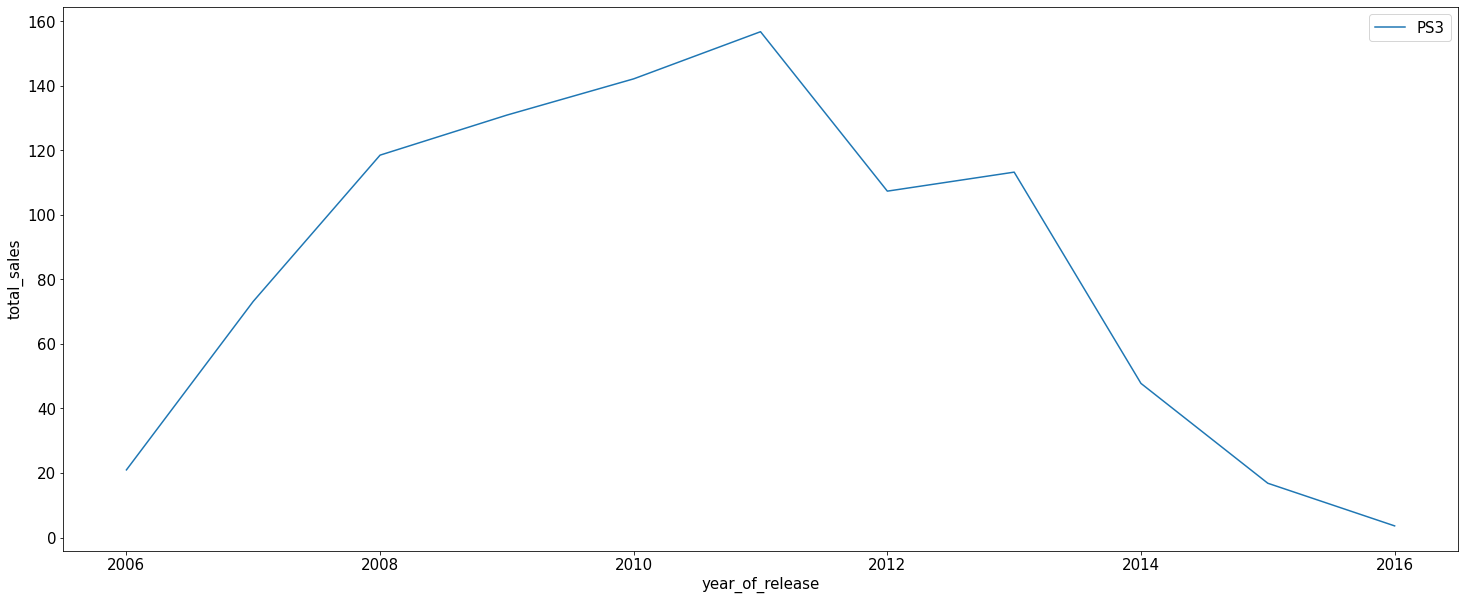

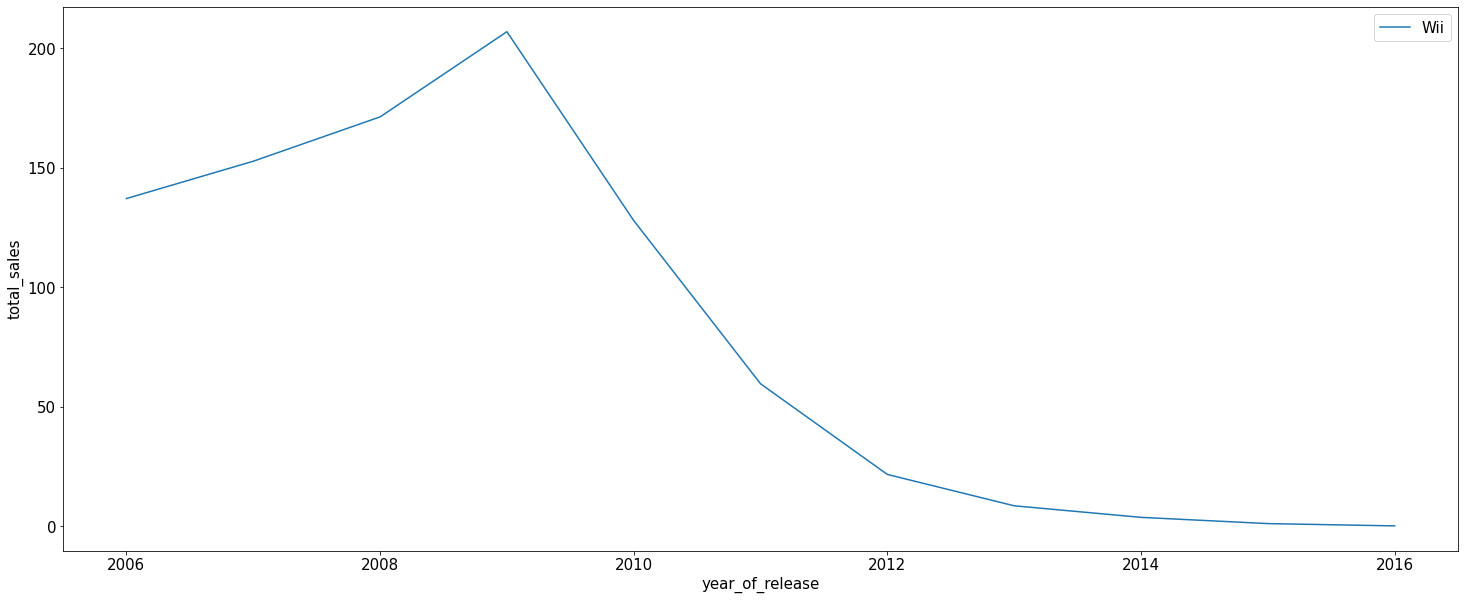

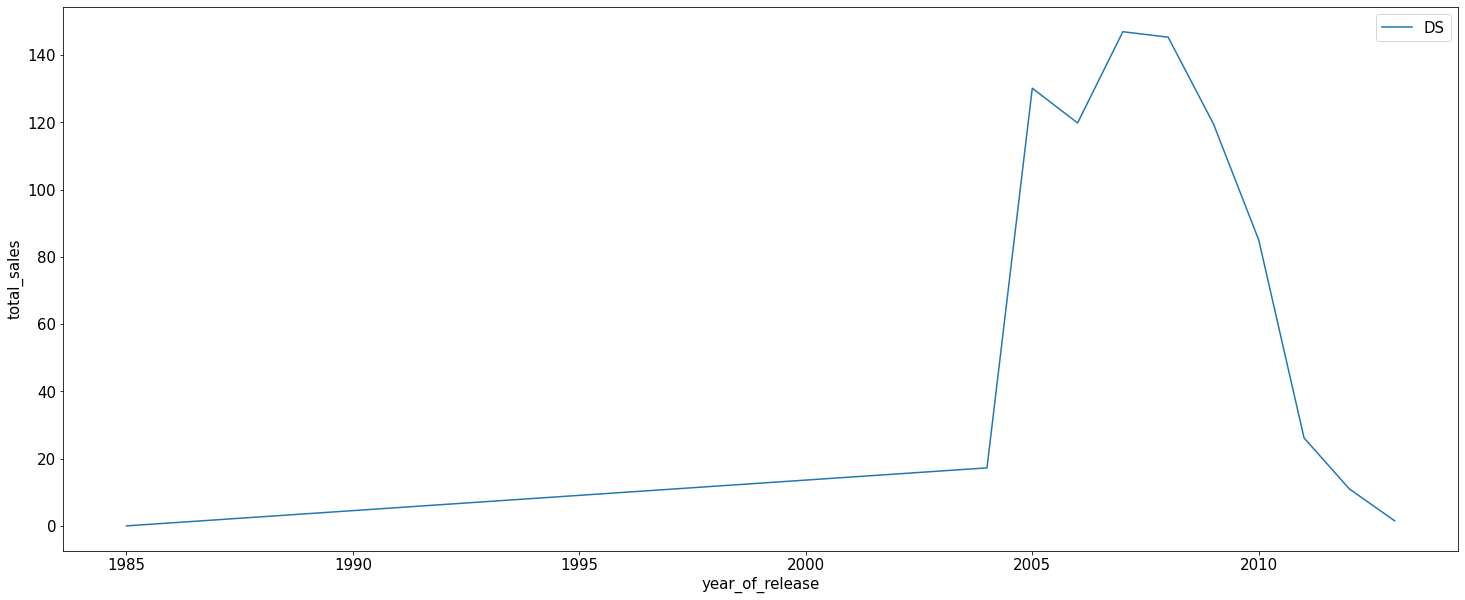

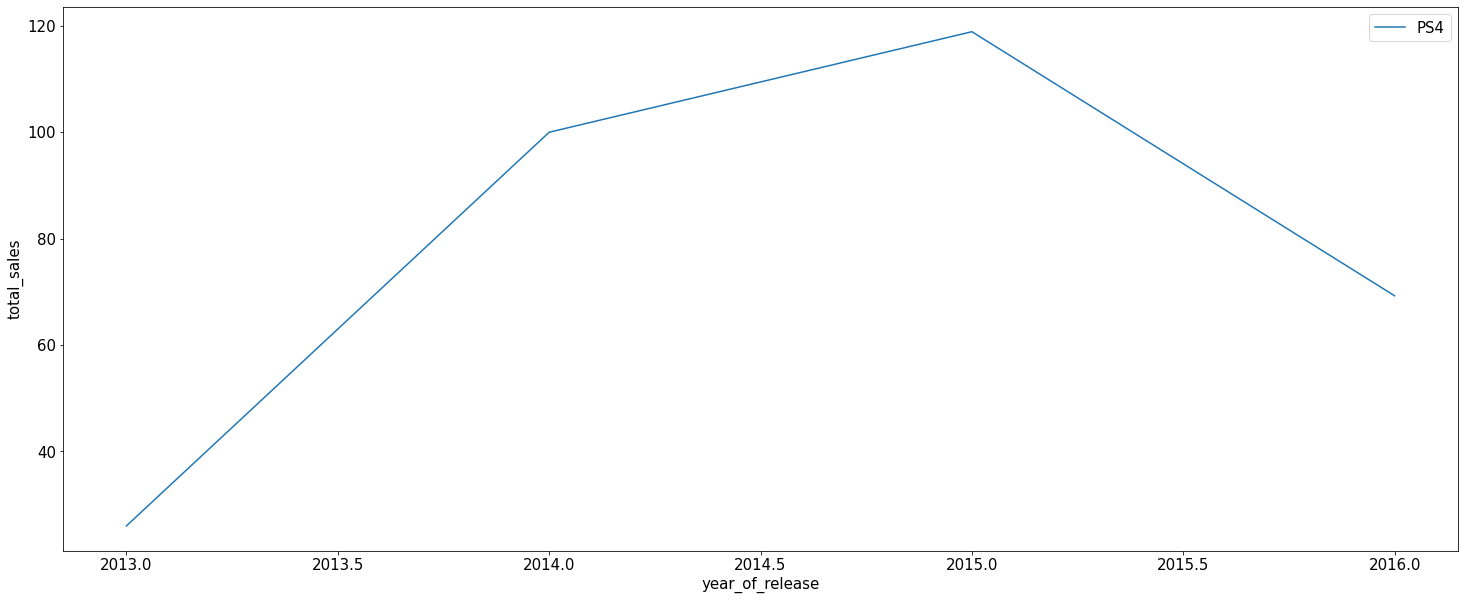

In [27]:
platforms=['PS2', 'X360', 'PS3','Wii', 'DS', 'PS4']
for value in platforms:
    plt.rcParams['font.size'] = '15'
    game_data_platform=game_data[game_data['platform']==value].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')        
    game_data_platform.plot(y='total_sales', ylabel='total_sales', figsize = (25,10), label=value)

По графикам видно, что срок использования платформ примерно 10 лет, новые платформы появляются через 2 года. 

### Отсортируем данные по актуальному периоду

In [28]:
#Выберем актуальный период с 2014 по 2016 год
game_data_actual=game_data.query('2014<=year_of_release and year_of_release<=2016')
game_data_actual.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-5.0,-5.0,unknown,14.63
1,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-5.0,-5.0,unknown,11.68
3,77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-5.0,-5.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown,0.01
1685,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown,0.01
1686,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown,0.01
1687,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-5.0,-5.0,unknown,0.01


### Найдем 6 платформ с самыми большими продажами 

In [29]:
game_data_actual_top=game_data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
game_data_actual_top6=game_data_actual_top.sort_values(by='total_sales', ascending=False).head(6)
game_data_actual_top6

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98


In [30]:
game_data_actual_top6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, PS4 to WiiU
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_sales  6 non-null      float64
dtypes: float64(1)
memory usage: 96.0+ bytes


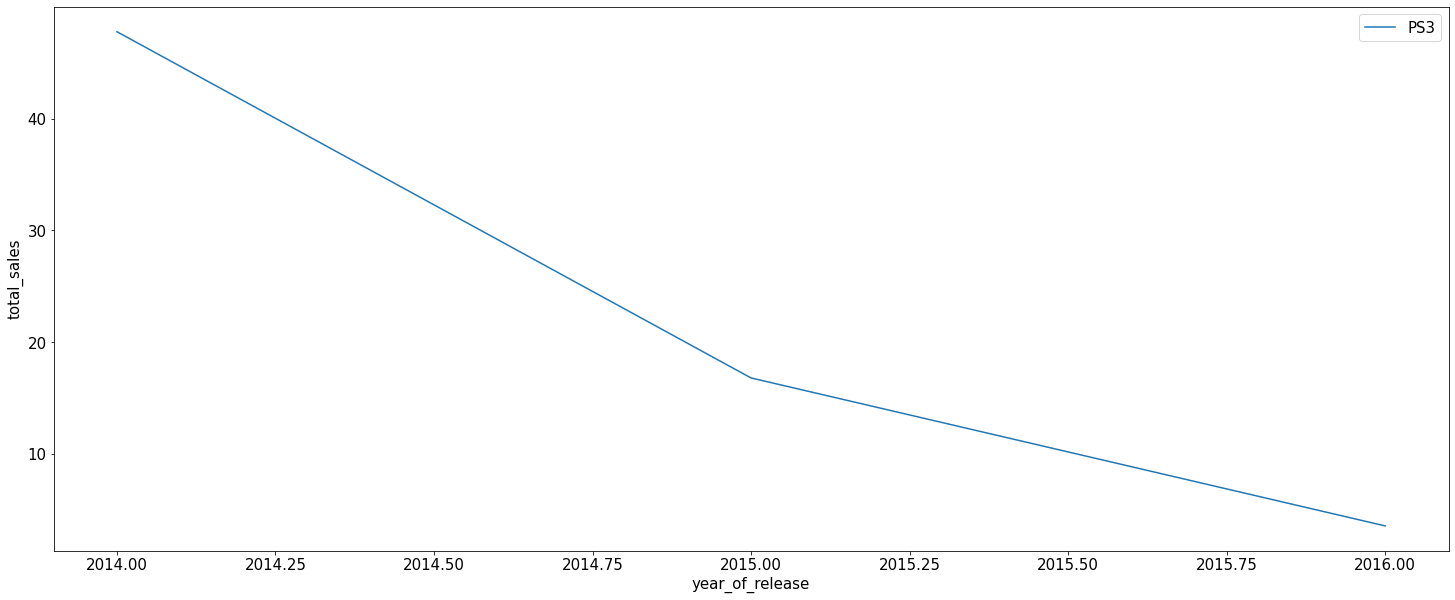

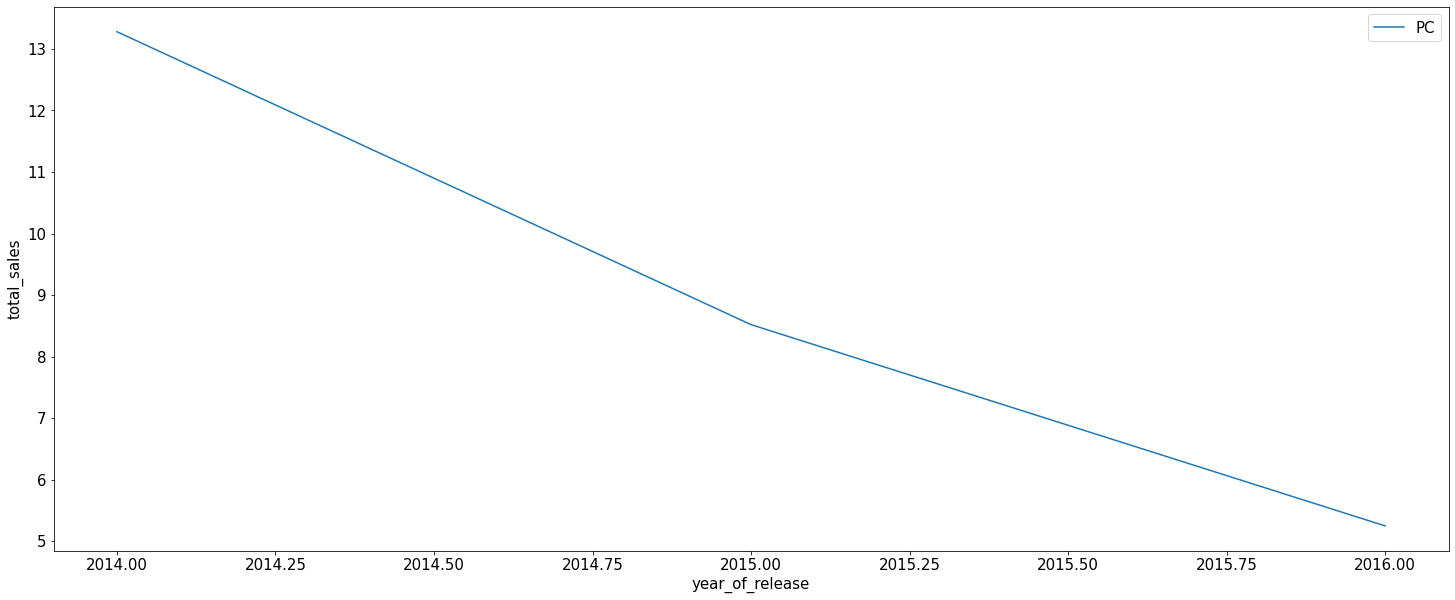

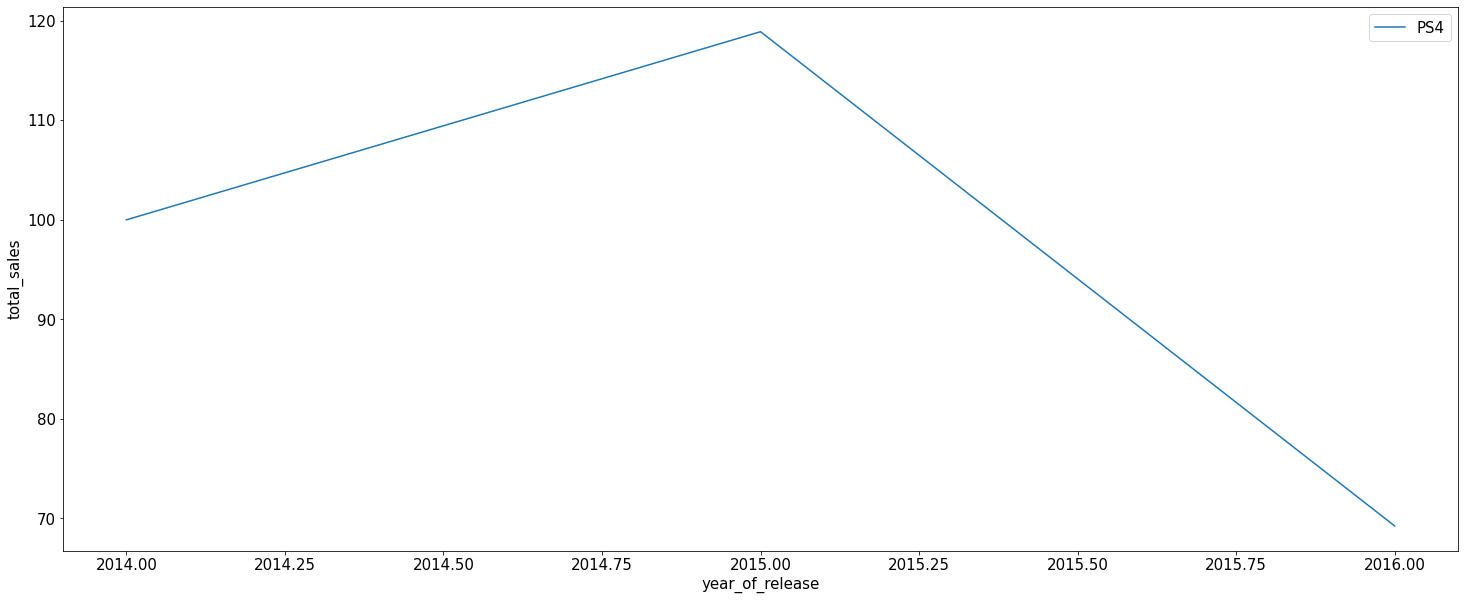

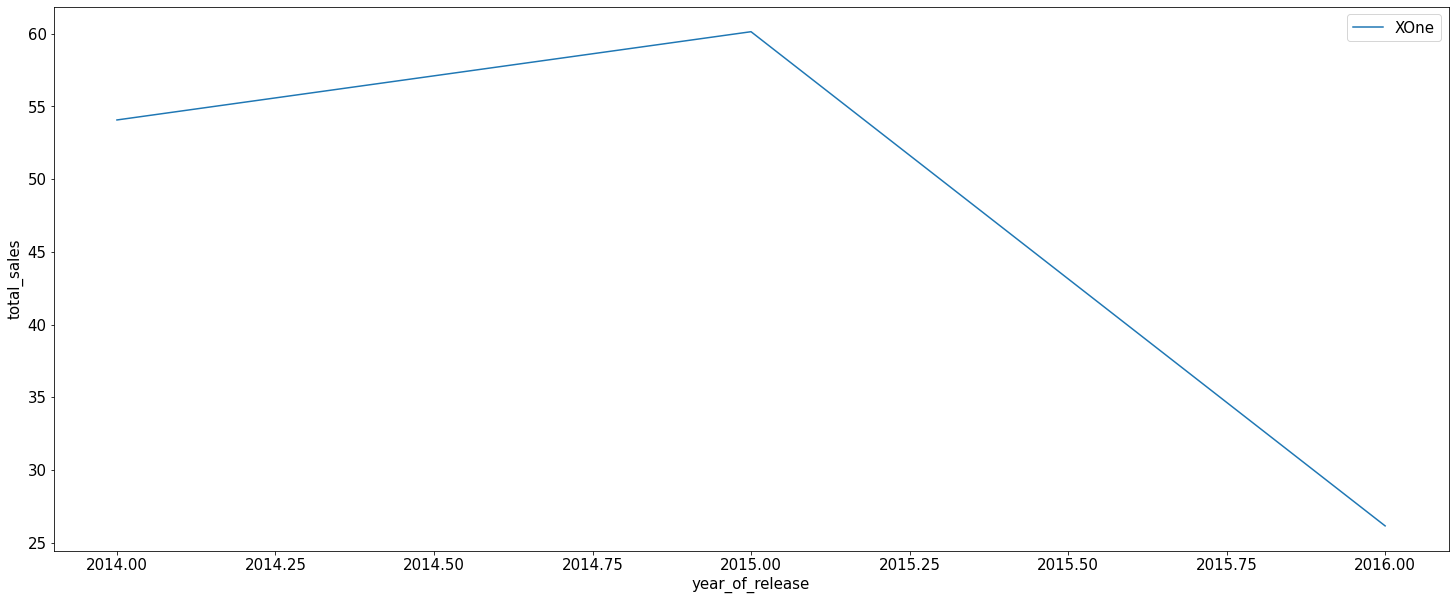

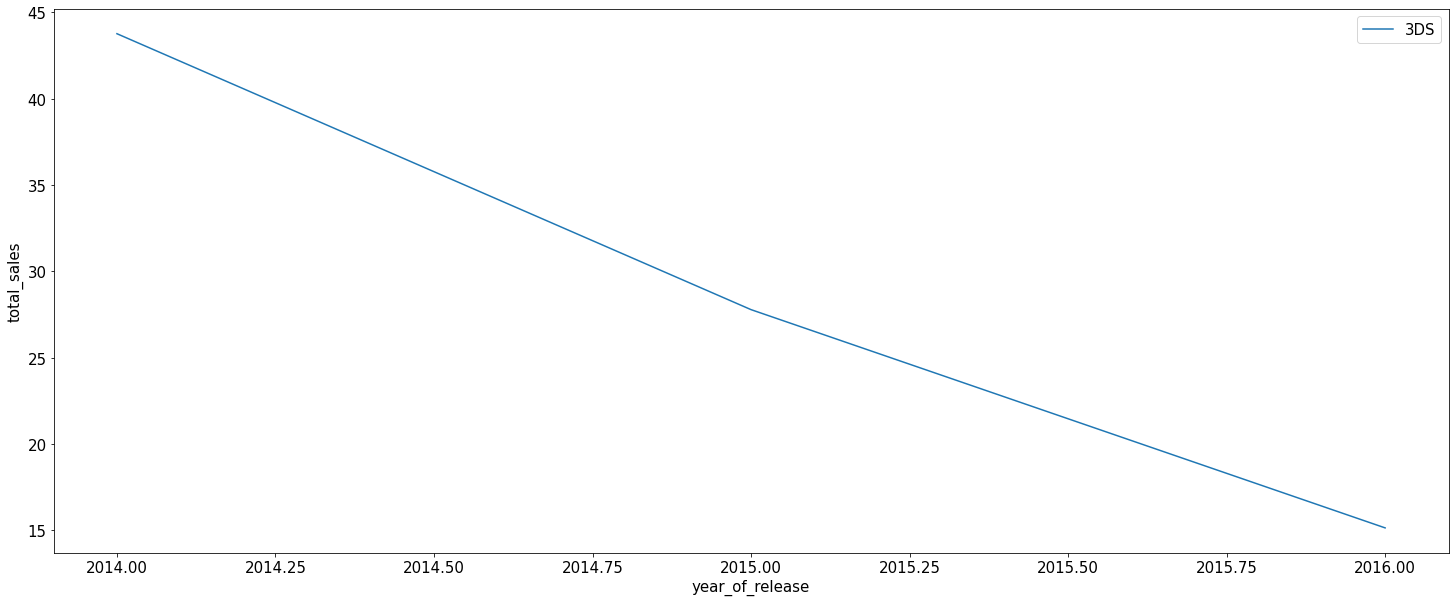

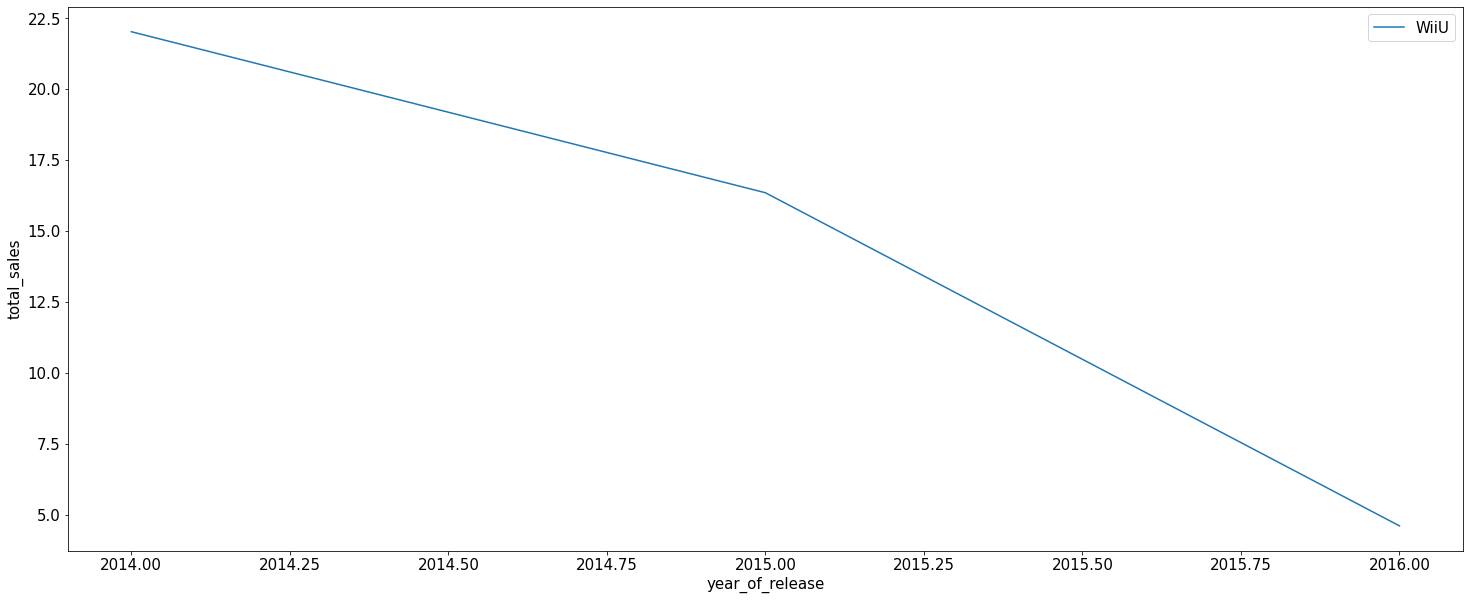

In [31]:
#Построим по ним графики суммарных продаж по годам
platforms_act=['PS3', 'PC', 'PS4','XOne', '3DS', 'WiiU']
for value in platforms_act:
    plt.rcParams['font.size'] = '15'
    game_data_act_platform=game_data_actual[game_data_actual['platform']==value].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')        
    game_data_act_platform.plot(y='total_sales', ylabel='total_sales', figsize = (25,10), label=value)

По сравнению с предыдущим периодом, на рынок пришли новые платформы XOne и
3DS, а ушли PS2 и DS. Техника развивается, прогресс не стоит на месте. Лидируют платформы PS3, X360, PS4. У старых платформ продажи в течение всего периода падали, у новых PS4 и XOne продажи росли, начиная с года их выпуска до 2016, а потом тоже начали падать.

### Диаграмма размаха

In [32]:
#Отсортируем нашу таблицу по 6 лучшим платформам
game_data_actual_top6=game_data_actual[game_data_actual['platform'].isin(["PS3", "PC", "PS4", "3DS", "WiiU", "XOne"])]

In [33]:
# функция, получающая на вход название признака, и возвращающая границы "усов"
def det_whiskers_top6(column):
    stat = game_data_actual_top6[column].describe()
    
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый "ус"   
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

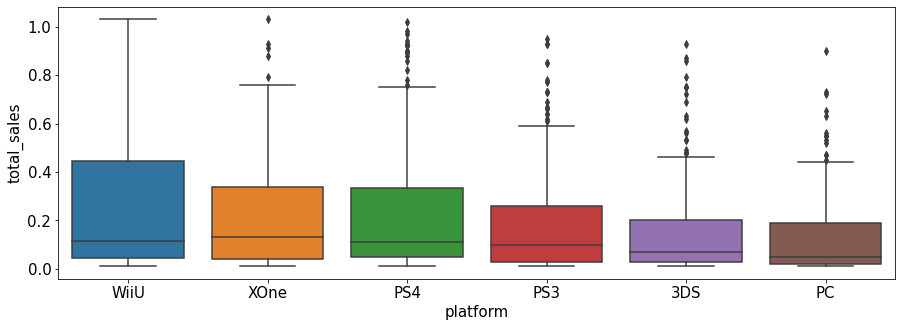

In [34]:
#Построим диаграммы размаха по нашим данным и отбросим выбивающиеся значения
fig, ax = plt.subplots(figsize =(15,5))
sbn.boxplot(x='platform', y='total_sales', data=game_data_actual_top6[game_data_actual_top6['total_sales'] <= det_whiskers_top6('total_sales')[1]], ax=ax) 

Вывод:

У платформ WiiU, Xone, и PS4 большая часть значений больше медианного. Более равномерно распределены значения у платформ 3DS и PS3.



### Влияние на продажи оценки критиков и пользователей

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

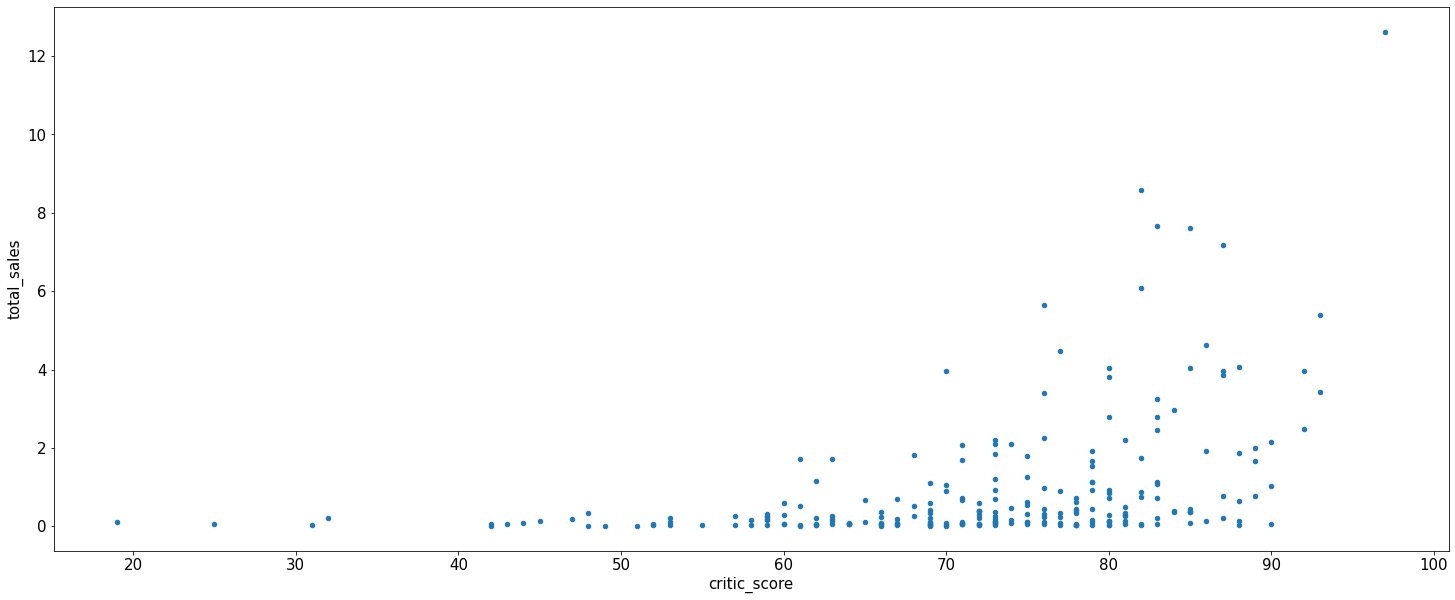

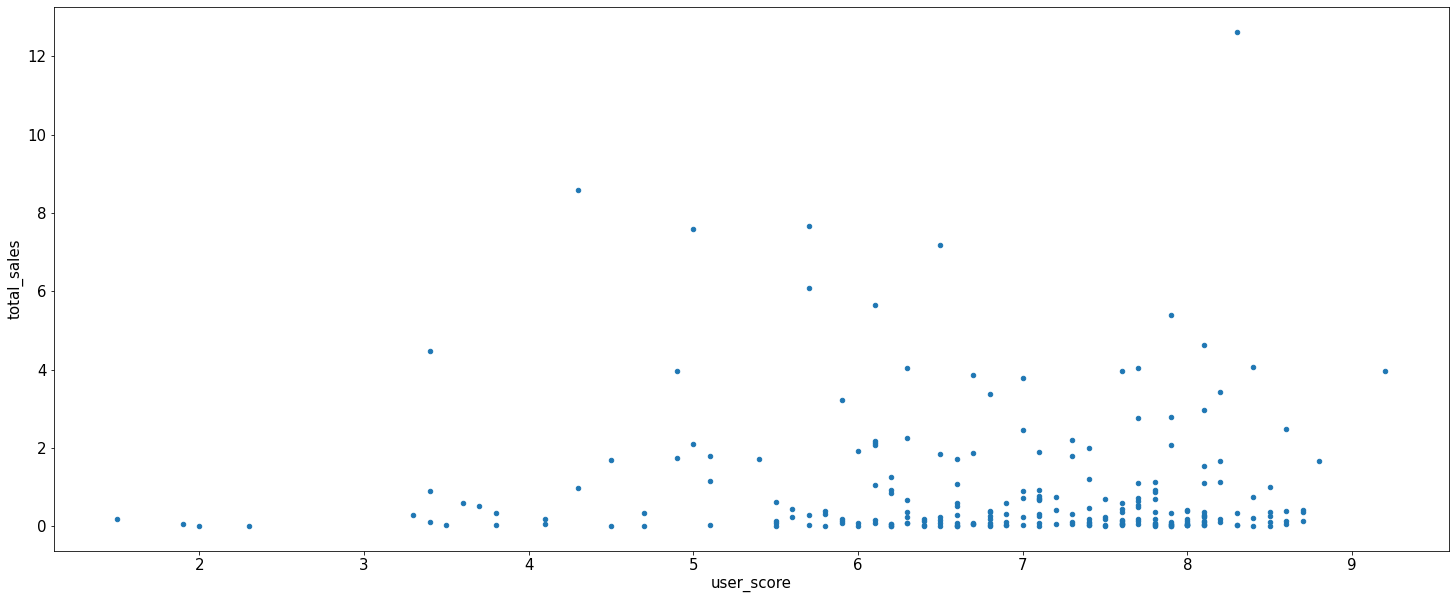

In [35]:
#Построим диаграмму рассеивания по платформе, стоящей на 1 месте, PS4
game_data_actual_ps4=game_data_actual.query('platform=="PS4" and critic_score!=-5 and user_score!=-5').reset_index()
game_data_actual_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(25, 10))
game_data_actual_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(25, 10))

In [36]:
#Найдем коэффициент кореляции между суммарными продажами и рейтингом критиков
game_data_actual_ps4['total_sales'].corr(game_data_actual_ps4['critic_score'])

0.40190287811475334

In [37]:
#Найдем коэффициент кореляции между суммарными продажами и рейтингом пользователей
game_data_actual_ps4['total_sales'].corr(game_data_actual_ps4['user_score'])

-0.04318585997193634

По диаграммам рассеивания разницы не заметно.
По коэффициенту Пирсона видно, на продажи влияет рейтинг официальных критиков, а мнение пользователей вообще не влияет.

### Влияние на продажи рейтинга критиков и пользователей на остальных платформах

#### Платформа PS3

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

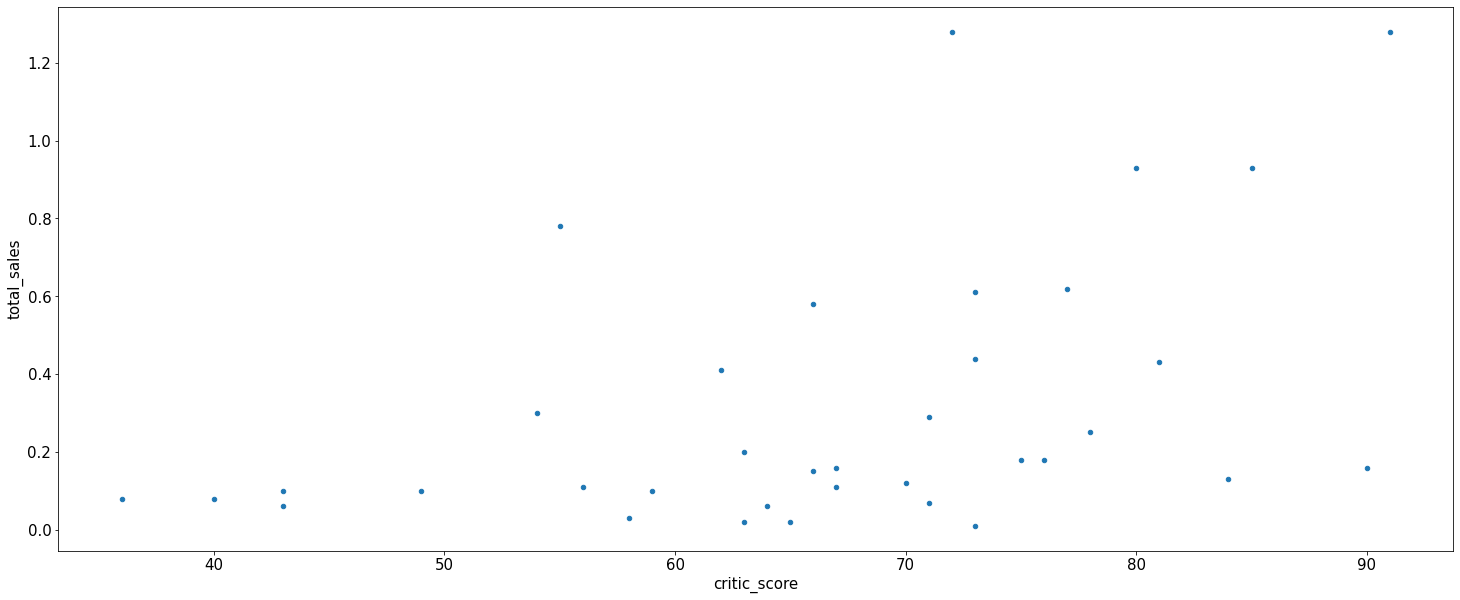

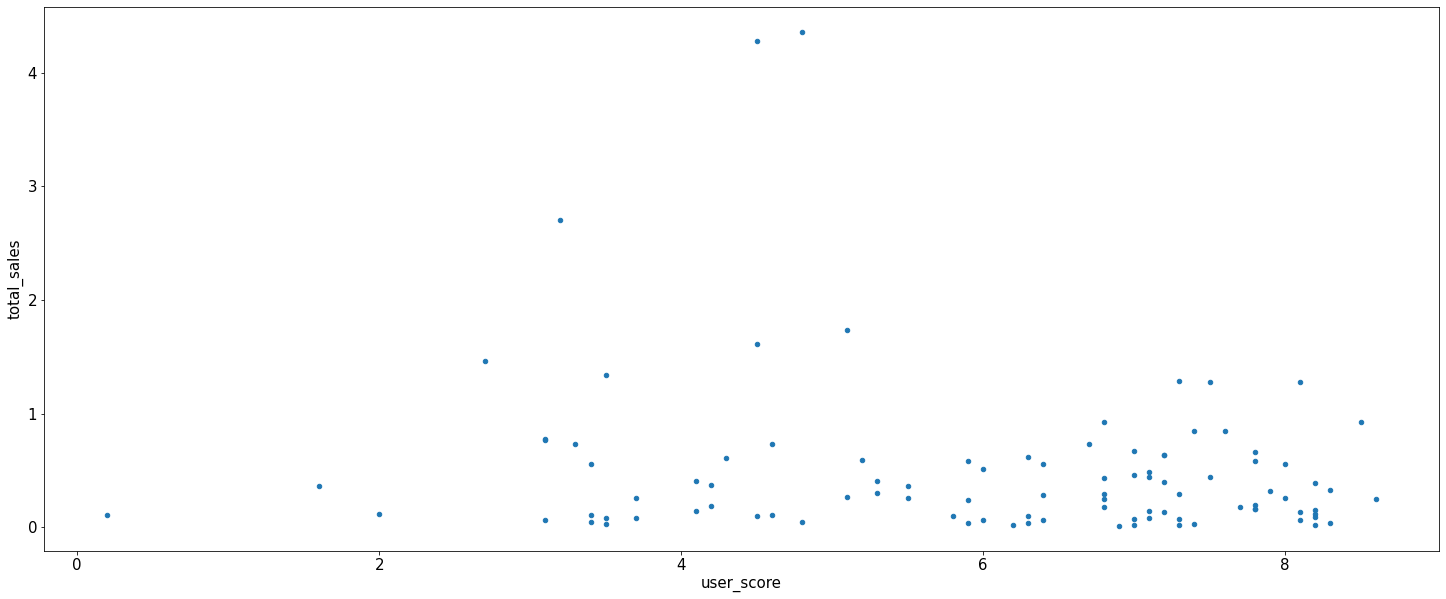

In [38]:
game_data_actual.query('platform=="PS3" and critic_score!=-5').reset_index().plot(kind='scatter', x='critic_score', y='total_sales', figsize=(25, 10))
game_data_actual.query('platform=="PS3" and user_score!=-5').reset_index().plot(kind='scatter', x='user_score', y='total_sales', figsize=(25, 10))

In [39]:
#Коэффициент корреляции
print(game_data_actual.query('platform=="PS3" and critic_score!=-5')['total_sales'].corr(game_data_actual.query('platform=="PS3"')['critic_score']))
print(game_data_actual.query('platform=="PS3" and user_score!=-5')['total_sales'].corr(game_data_actual.query('platform=="PS3"')['user_score']))

0.44657460493190704
-0.16676141347662116


Выводы:

Диаграмма рассеивания у PS3 более слабая, потому что пик попялярности платформа свой прошла и продажи пошли на убыль. По коэффициенту Пирсона  зависимость продаж от официального рейтинга 0,44. Зависимость от оценки пользователей очень слабая и приобрела направление в отрицательную сторону.

#### Платформа 3DS

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

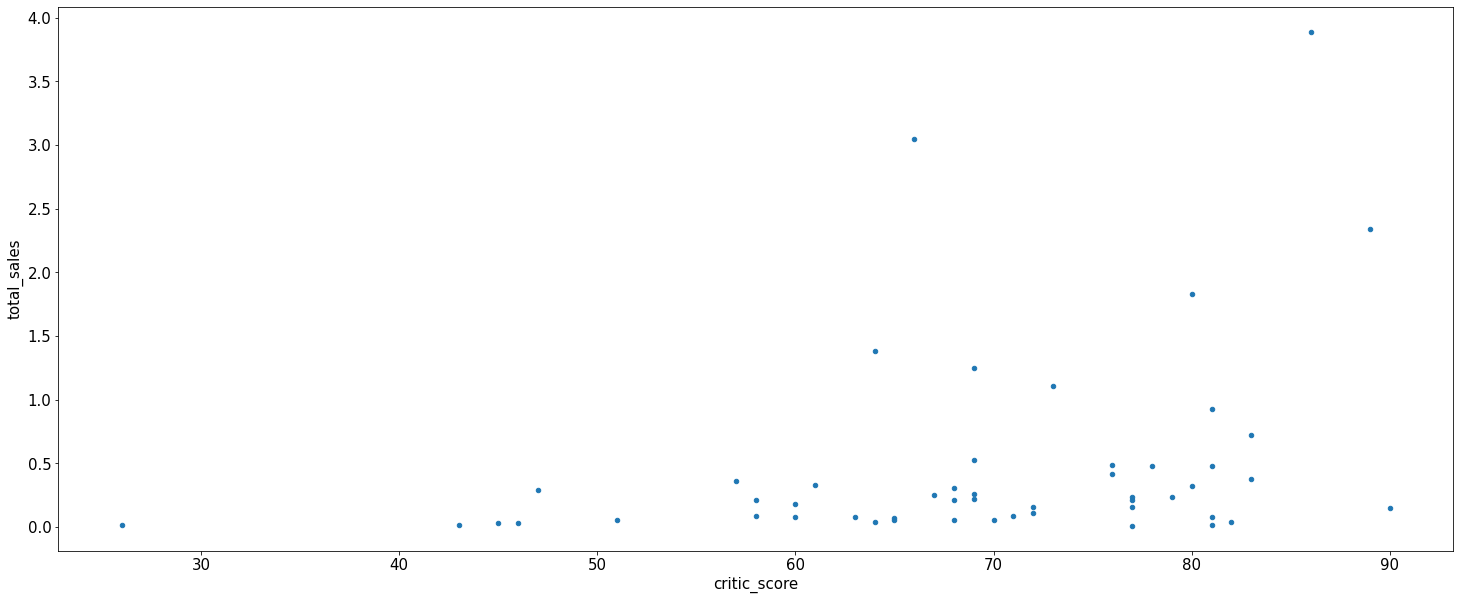

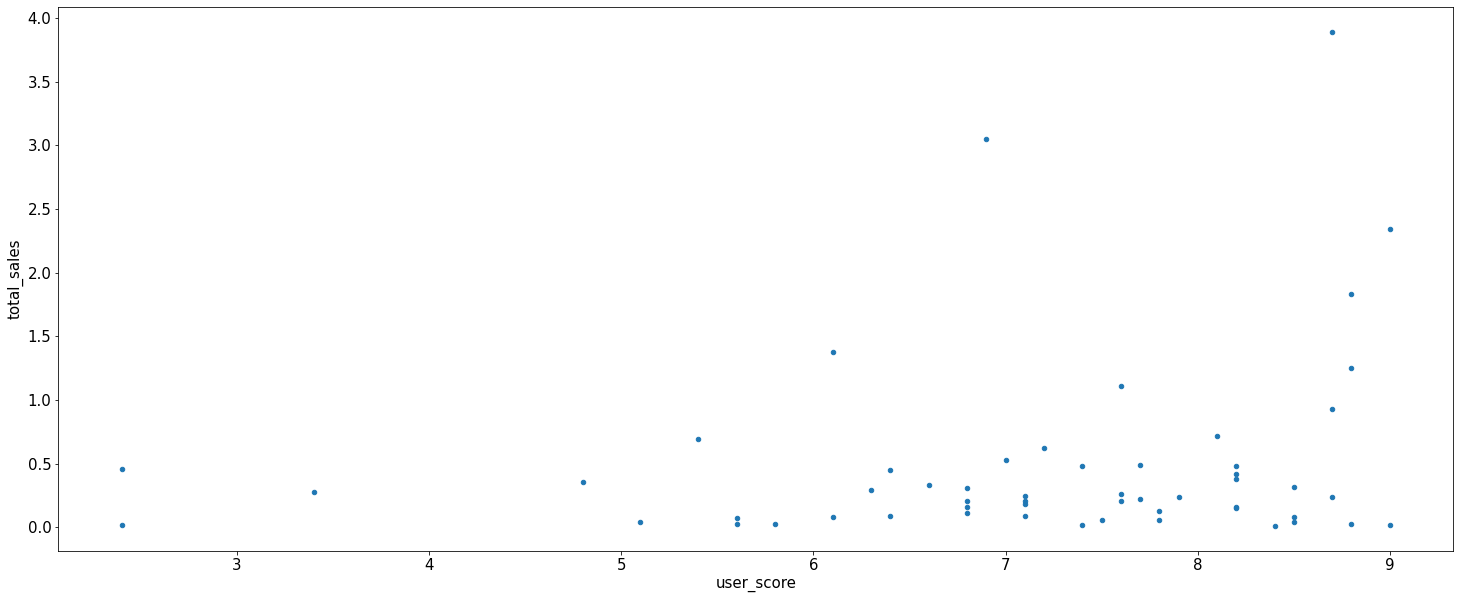

In [40]:
game_data_actual.query('platform=="3DS" and critic_score!=-5').reset_index().plot(kind='scatter', x='critic_score', y='total_sales', figsize=(25, 10))
game_data_actual.query('platform=="3DS" and user_score!=-5').reset_index().plot(kind='scatter', x='user_score', y='total_sales', figsize=(25, 10))

In [41]:
#Коэффициент корреляции
print(game_data_actual.query('platform=="3DS" and critic_score!=-5')['total_sales'].corr(game_data_actual.query('platform=="3DS"')['critic_score']))
print(game_data_actual.query('platform=="3DS" and user_score!=-5')['total_sales'].corr(game_data_actual.query('platform=="3DS"')['user_score']))

0.31411749286905105
0.2151932718527028


Выводы:

Облако рассеивания здесь более разряженное,  у 3DS значений меньше. Это связано с тем, что 3DS меньше покупают, чем PS4. По коэффициенту Пирсона продажи меньше зависят от официального рейтинга, но увеличилась зависимость от оценки пользователей, коэффициент Пирсона 0,25.

#### Платформа XOne

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

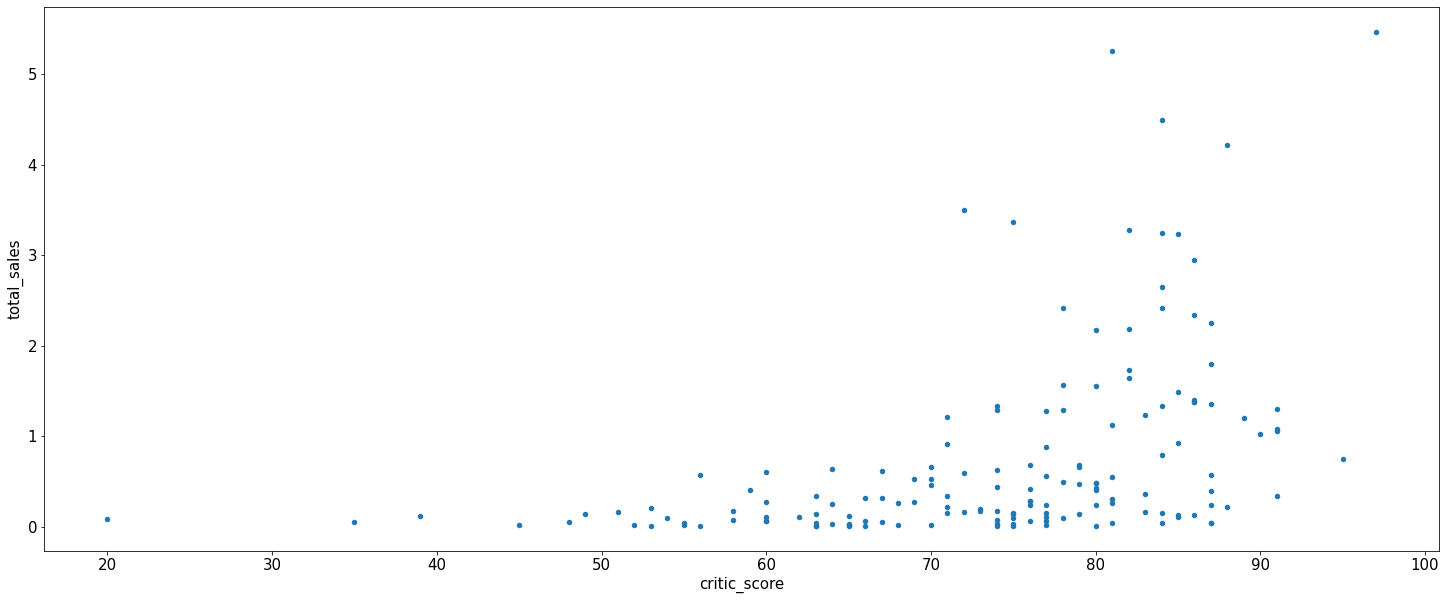

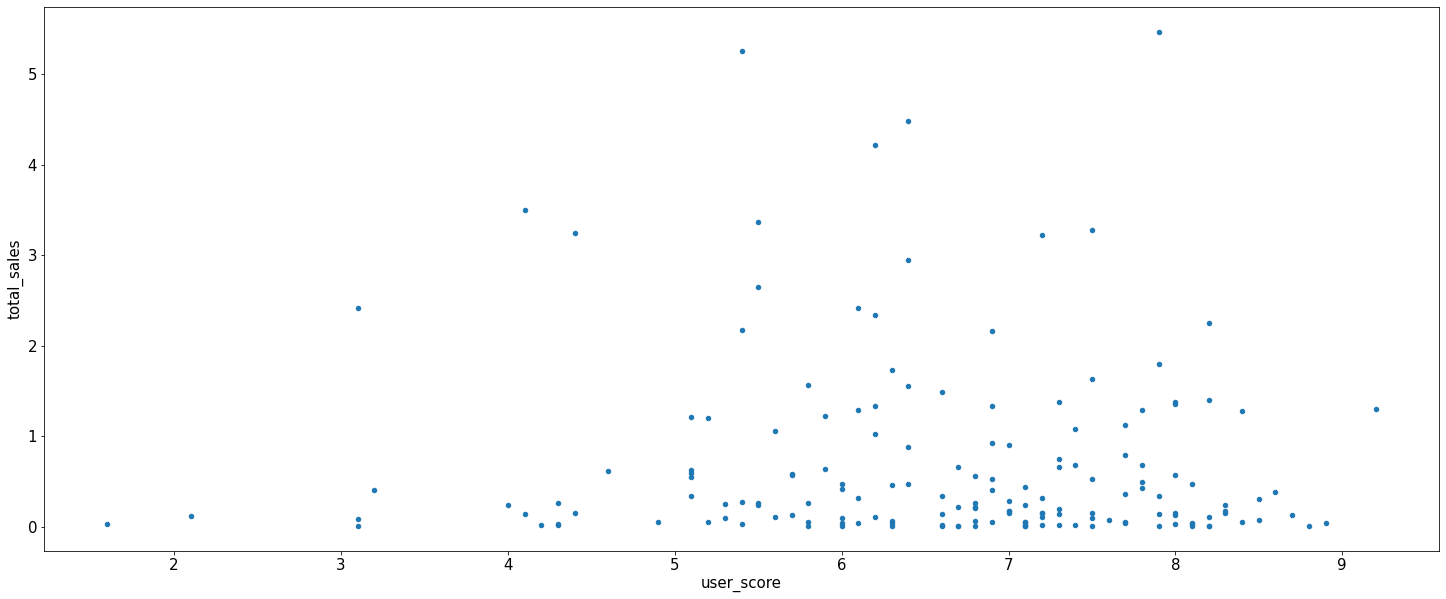

In [42]:
game_data_actual.query('platform=="XOne" and critic_score!=-5').reset_index().plot(kind='scatter', x='critic_score', y='total_sales', figsize=(25, 10))
game_data_actual.query('platform=="XOne" and user_score!=-5').reset_index().plot(kind='scatter', x='user_score', y='total_sales', figsize=(25, 10))

In [43]:
#Коэффициент корреляции
print(game_data_actual.query('platform=="XOne" and critic_score!=-5')['total_sales'].corr(game_data_actual.query('platform=="XOne"')['critic_score']))
print(game_data_actual.query('platform=="XOne" and user_score!=-5')['total_sales'].corr(game_data_actual.query('platform=="XOne"')['user_score']))

0.42867694370333226
-0.0703839280647581


Выводы:

Диаграмма рассеивания у платформы XOne и PS4 похожи. По коэффициенту Пирсона продажи также зависят от официального рейтинга. Зависимости от оценки пользователей нет.

### Общее распределение игр по жанрам

In [44]:
#Выберем 6 жанров с наибольшими продажами
game_data_actual_genre=game_data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
game_data_actual_genre.sort_values(by='total_sales', ascending=False).head(6)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100


По медианному значению самыми прибыльными жанрами являются Shooter, Sports, Misc. Малоприбыльныме жанры - это Fighting, Role-Playing, Simulation.

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

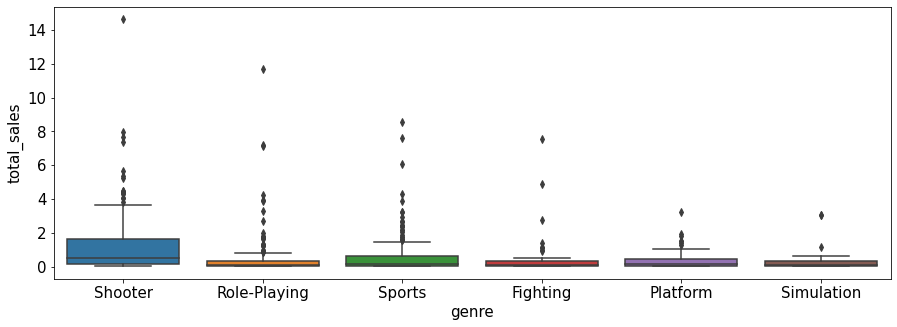

In [45]:
#Построим диаграммы размаха по жанрам 
fig, ax = plt.subplots(figsize =(15,5))
sbn.boxplot(x='genre', y='total_sales', data=game_data_actual[game_data_actual['genre'].isin(['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing','Simulation'])], ax=ax) 

## Портреты пользователя каждого региона

In [46]:
#Найдем 5 самых популярных жанров в регионе Северная Америка
game_data_actual_genre=game_data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
game_data_actual_genre.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [47]:
#Найдем 5 самых популярных платформ в регионе Северная Америка
game_data_actual_platform=game_data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
game_data_actual_platform.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [48]:
#Найдем 5 самых популярных платформ в регионе Европа
game_data_actual_platform=game_data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
game_data_actual_platform.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [49]:
#Найдем 5 самых популярных жанров в регионе Европа
game_data_actual_genre=game_data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
game_data_actual_genre.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [50]:
#Найдем 5 самых популярных платформ в регионе Япония
game_data_actual_platform=game_data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
game_data_actual_platform.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [51]:
#Найдем 5 самых популярных жанров в регионе Япония
game_data_actual_genre=game_data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
game_data_actual_genre.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Выводы:

В Америке и в Европе самые популярные платформы PS4 и Xbox One,  а в Японии PS4 и 3DS. Разницы в предпочтениях по жанрам между Америкой и Европой почти нет, больше всего нравятся жанры Action, Shooter, Sports. В Японии популярны жанры Action и Role-Playing.

### Влияние  на продажи рейтинга ESRB

<AxesSubplot:xlabel='rating'>

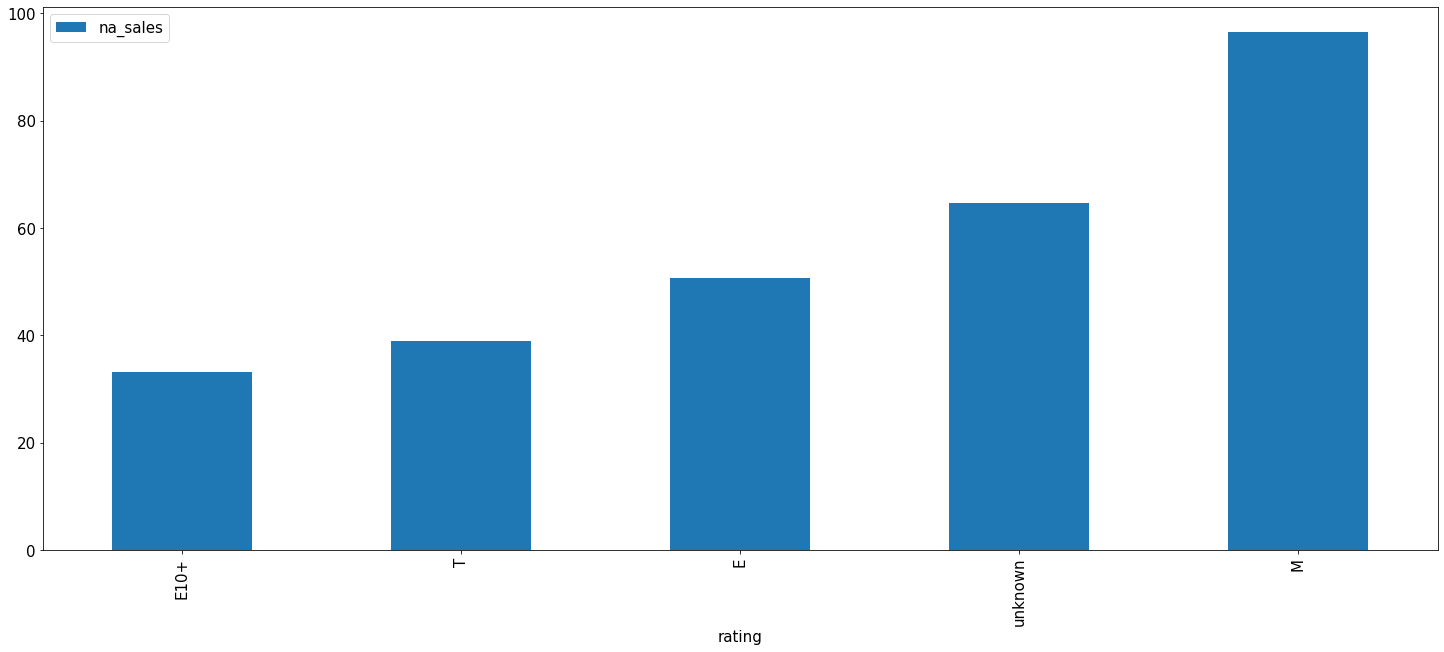

In [52]:
#Построим диаграмму зависимости между продажами и рейтингом ESRB в регионе Северная Америка
esrb_na_sales = game_data_actual.pivot_table(index = 'rating', values ='na_sales', aggfunc = 'sum')
esrb_na_sales.sort_values(by='na_sales').plot(kind='bar', figsize = (25,10))

In [53]:
esrb_na_sales

,na_sales
rating,
E,50.74
E10+,33.23
M,96.42
T,38.95
unknown,64.72


<AxesSubplot:xlabel='rating'>

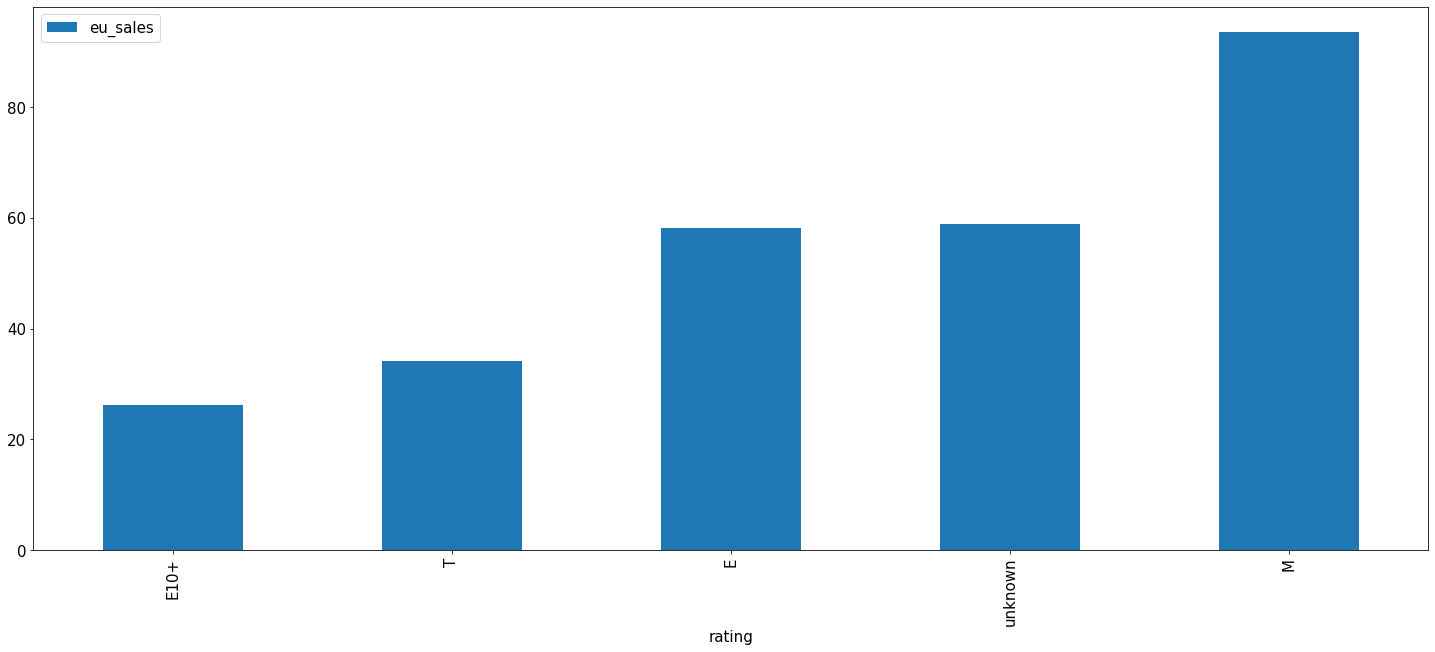

In [54]:
#Построим диаграмму зависимости между продажами и рейтингом ESRB в регионе Европа
esrb_eu_sales = game_data_actual.pivot_table(index = 'rating', values ='eu_sales', aggfunc = 'sum')
esrb_eu_sales.sort_values(by='eu_sales').plot(kind='bar', figsize = (25,10))

<AxesSubplot:xlabel='rating'>

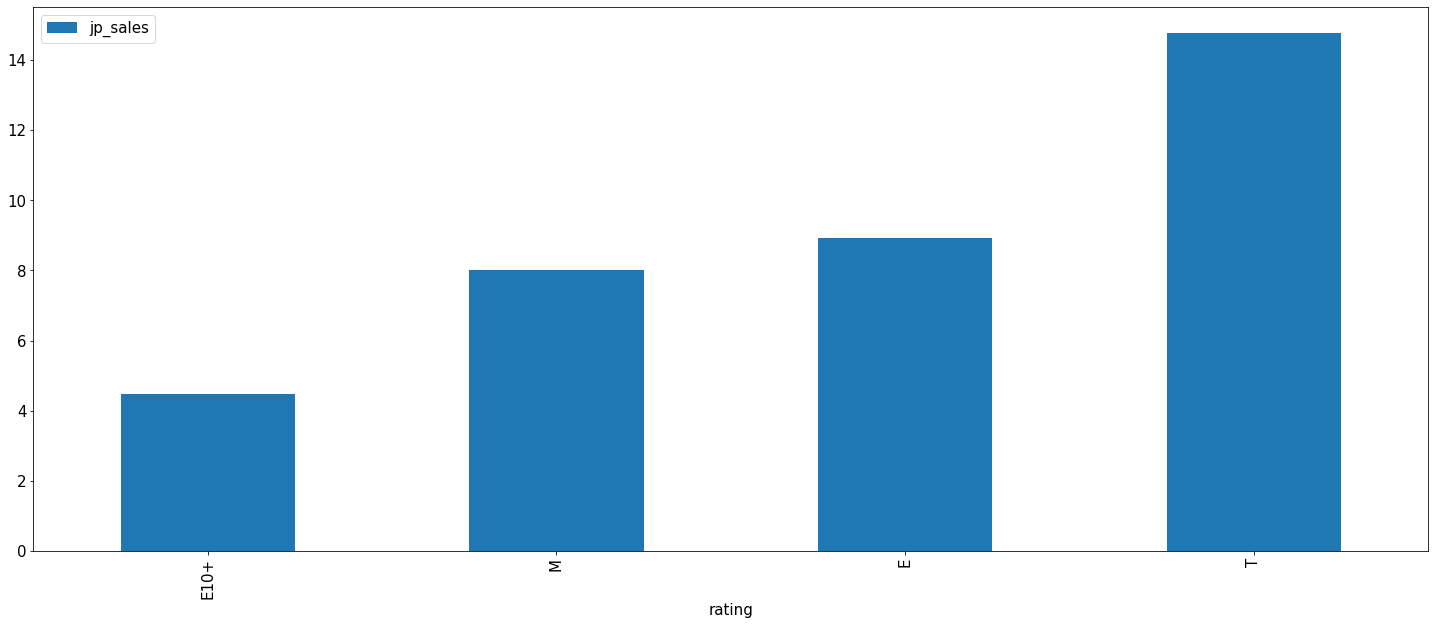

In [55]:
#Построим диаграмму зависимости между продажами и рейтингом ESRB в регионе Япония
esrb_jp_sales = game_data_actual[game_data_actual['rating']!='unknown'].pivot_table(index = 'rating', values ='jp_sales', aggfunc = 'sum')
esrb_jp_sales.sort_values(by='jp_sales').plot(kind='bar', figsize = (25,10))

Выводы:

По диаграммам видно, что рейтинг ESRB влияет на продажи компьютерных игр. В Америке и Европе больше продаются игры с категорией М, а в Японии рейтинг ESRB слабо влияет на продажи игр.

## Проверка  гипотез

### средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза будет средние пользовательские рейтинги платформ Xbox One и PC одинаковые, альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [56]:
#Создадим датасет по пользовательскому рейтингу платформы Xone
xone=game_data_actual.query('platform=="XOne" and user_score!=-5')['user_score']
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [57]:
#Создадим датасет по пользовательскому рейтингу платформы PC
pc=game_data_actual.query('platform=="PC" and user_score!=-5')['user_score']

In [58]:
#Проверяем состоятельность гипотезы
alpha=0.03

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [59]:
#Подсчитаем средния значение пользовательских рейтингов платформ PC и Xbox One
xone.mean()

6.594545454545456

In [60]:
pc.mean()

6.298360655737705

Средние пользовательских рейтингов подтверждают, что рейтинги одинаковые

### средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза будет средние пользовательские рейтинги жанров Action и Sports одинаковые, альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные. 

In [61]:
#Создадим датасет по пользовательскому рейтингу в жанре Action 
action=game_data_actual.query('genre=="Action" and user_score!=-5')['user_score']

In [62]:
#Создадим датасет по пользовательскому рейтингу в жанре Sports 
sports=game_data_actual.query('genre=="Sports" and user_score!=-5')['user_score']

In [63]:
#Проверяем состоятельность гипотезы
alpha=0.03

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports одинаковые")

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports разные


In [64]:
#Подсчитаем средния значение пользовательских рейтингов игровых жанров Action  и Sports 
action.mean()

6.760606060606061

In [65]:
sports.mean()

5.2251968503937

Средние пользовательских рейтингов подтверждают, что рейтинги разные


Выводы:

Т.к. нам нужно было выяснить равны те или иные гипотезы, т.е. равенство между средними двух генеральных совокупностей, то выбрали для проверки метод st.ttest_ind. Поэтому нулевые гипотезы сделали рейтинги в обоих случаях равны, соответственно алтернативные гипотезы стали - рейтинги не равны. 

Все гипотезы подтведились. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и cредние пользовательские рейтинги жанров Action и Sports разные.

## Выводы. 

Полученные данные были не идеальными. Отсутствовала часть данных по продажам компьютерных игр. Были пропущеные значения в рейтингах официальных критиуов, пользователей. Посчитали суммарные прибыли по всем регионам. Опредилили какие самые популярные платформы в мире. Ими оказались PS4 и Xbox One. Самыми популярными жанрами являются шутеры, спортивные игры и платформинг. 
Были проверены две гипотезы, они подтвердились. Сравнили средние пользовательские рейтинги платформ Xbox One и PC, они одинаковые. И сравнили cредние пользовательские рейтинги жанров Action и Sports, они отличаются. 
